<a href="https://colab.research.google.com/github/Faradezo/Coleta_e_Armazenamento/blob/main/Codigo_R_trilha_3_bd_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de Dados

In [17]:
#pacotes para carregar o conector %>%
install.packages("magrittr") 
install.packages("dplyr")    
library(magrittr)
library(dplyr) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(ggplot2)
library(modelr)

In [19]:
data(diamonds)
diamantes <- diamonds

#Qual é a estrutura do conjunto de dados “diamantes”?
str(diamantes)
#Aqui, vemos que existem 10 variáveis totais (três fatores ordenados, um inteiro e 6 numéricos).
names(diamantes)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [20]:
#Explore a parte inicial e a final do conjunto de dados.
head(diamantes,10)
tail(diamantes, 10)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.71,Premium,E,SI1,60.5,55,2756,5.79,5.74,3.49
0.71,Premium,F,SI1,59.8,62,2756,5.74,5.73,3.43
0.70,Very Good,E,VS2,60.5,59,2757,5.71,5.76,3.47
0.70,Very Good,E,VS2,61.2,59,2757,5.69,5.72,3.49
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74


In [21]:
#Faça alguns sumários estatísticos para entender melhor a base de dados.
diamonds %>% 
  summarize(avg.price = mean(price),     # preço médio de todos os diamantes
            avg.carat = mean(carat),     # tamanho médio de quilate de todos os diamantes
            stdev.price = sd(price))     # calculando o desvio padrão

#A saída da função summary() está de acordo com a descrição mostrada anteriormente?
#preço em dólares americanos  ($326--$18,823) Sim
#peso do diamente (0.2--5.01)                 Sim

avg.price,avg.carat,stdev.price
<dbl>,<dbl>,<dbl>
3932.8,0.7979397,3989.44


price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


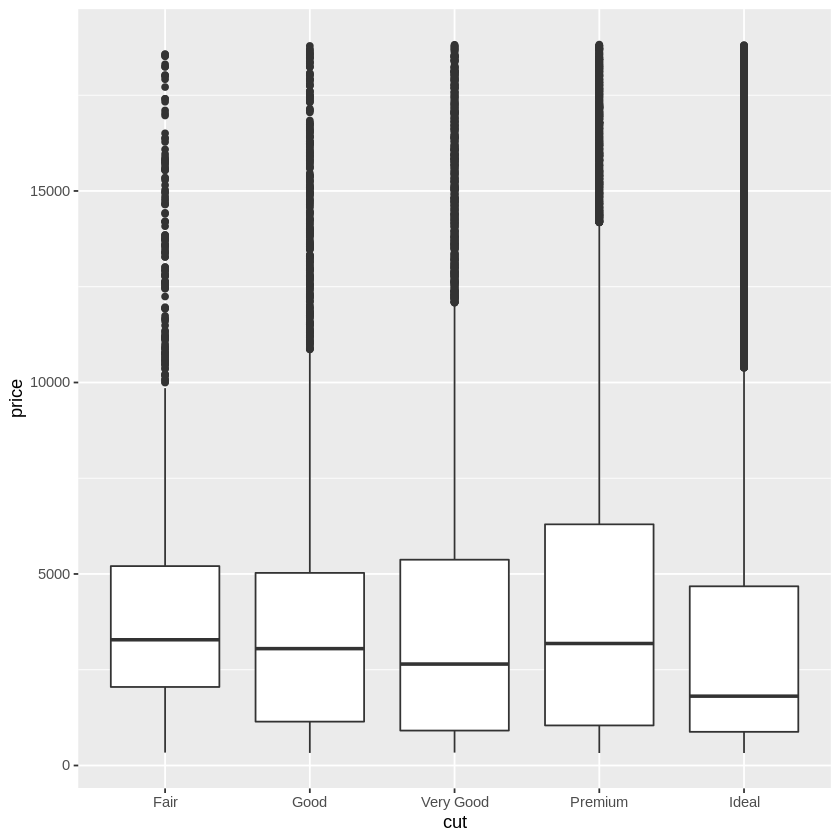

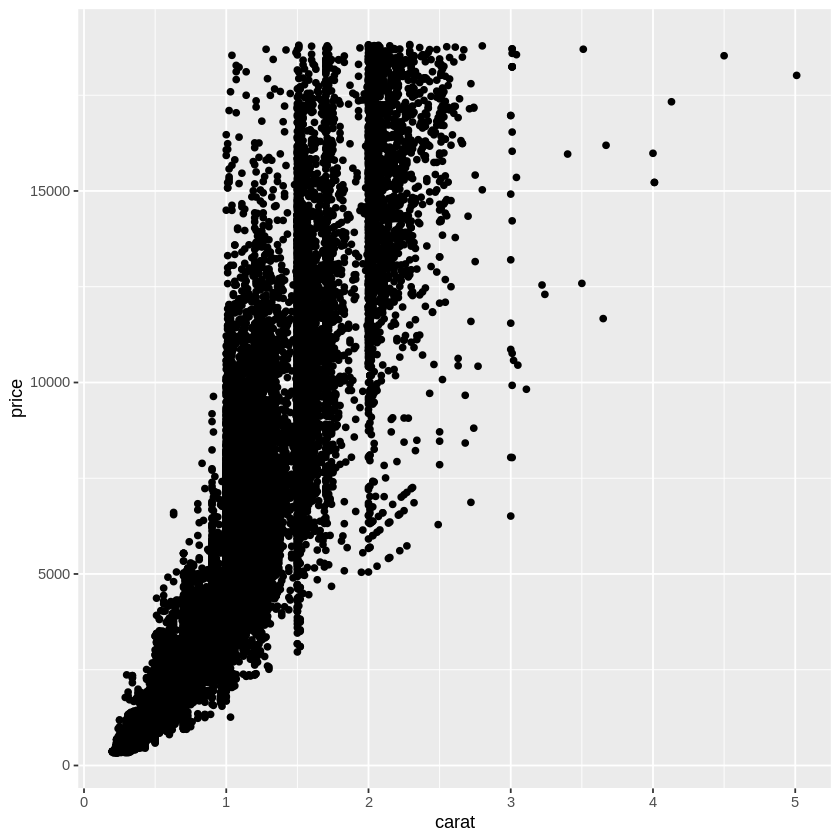

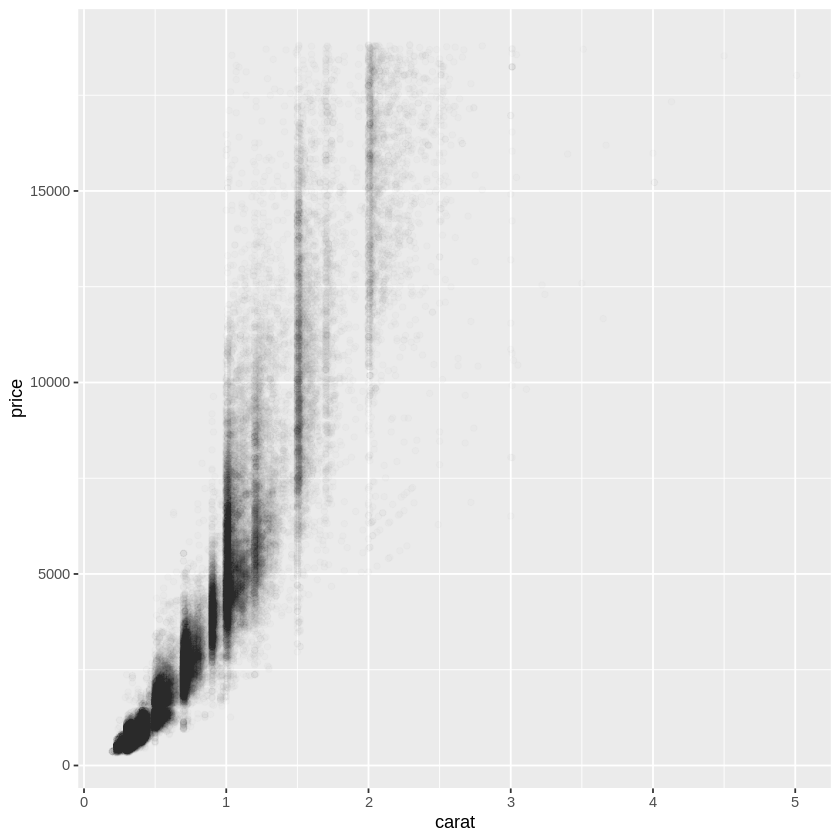

In [22]:
#Explore a variável price, seguindo o modelo de exploração


unusual <- diamantes %>% 
  filter(y < 3 | y > 20) %>% 
  select(price, x, y, z) %>%
  arrange(y)
unusual

ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))

ggplot(data = diamonds) + 
  geom_point(mapping = aes(x = carat, y = price), alpha = 1 / 100)

#Explore também as variáveis carat, cut, color, clarity, x, y, z, depth e table, seguindo o modelo de exploração.

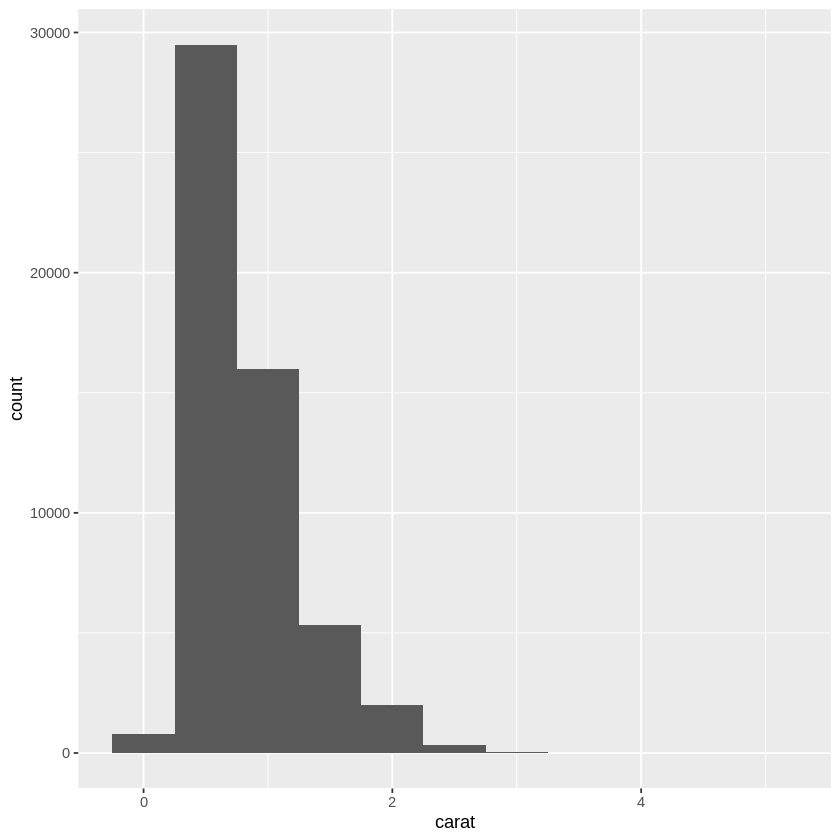

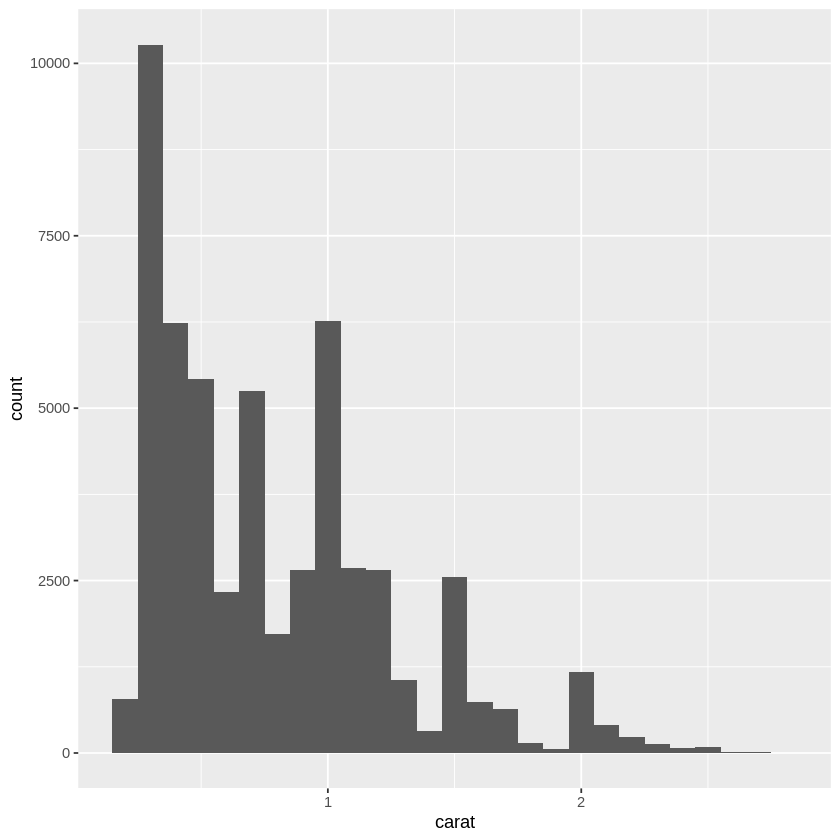

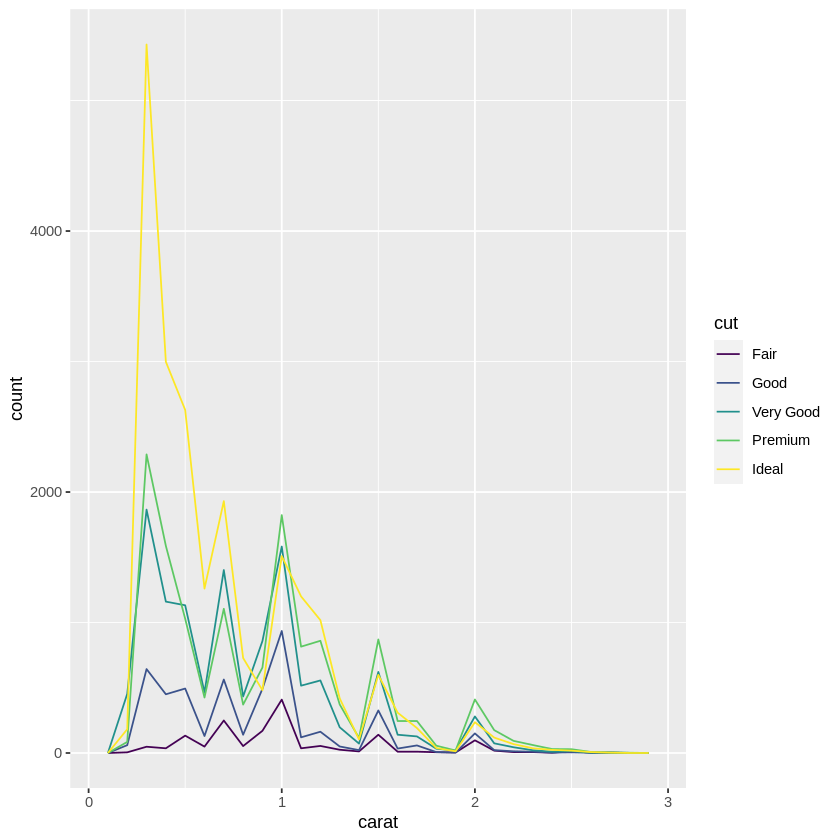

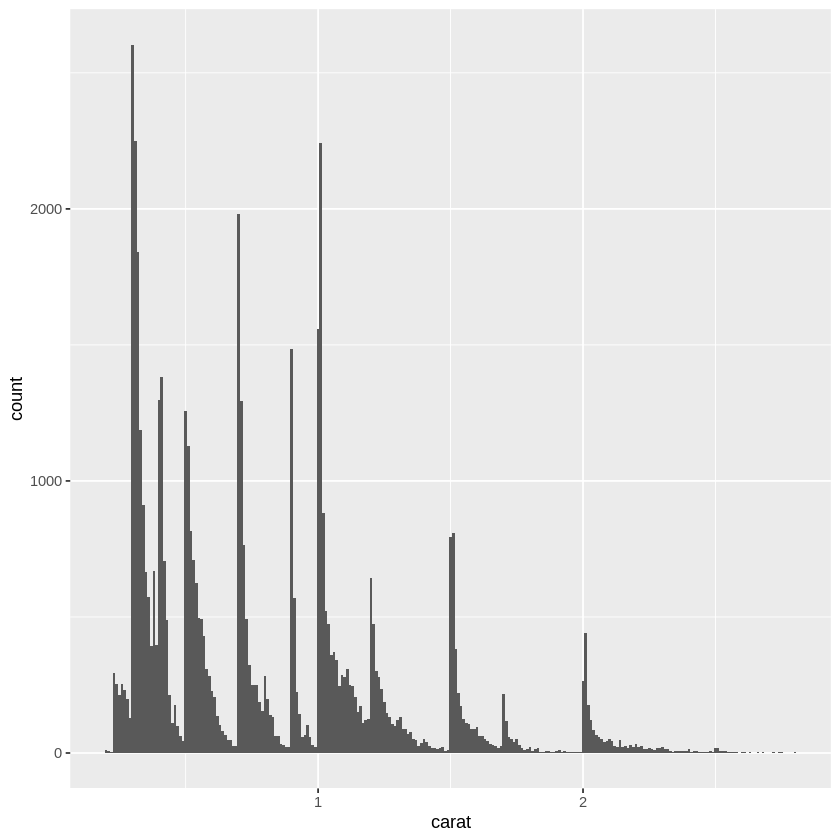

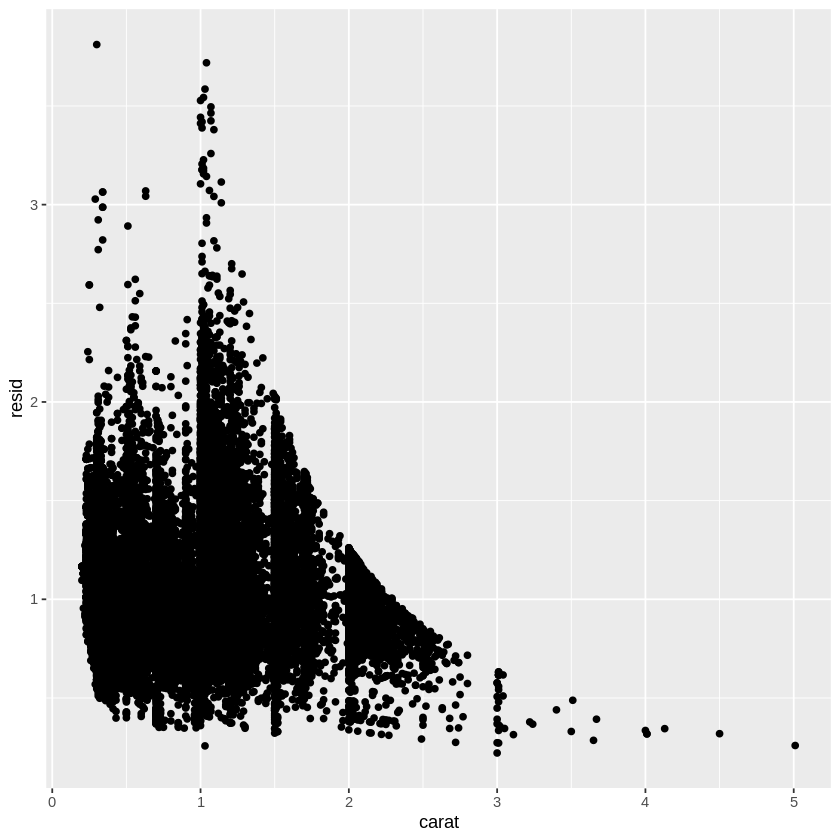

In [23]:
#carat
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

smaller <- diamonds %>% 
  filter(carat < 3)
  
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.1)

ggplot(data = smaller, mapping = aes(x = carat, colour = cut)) +
  geom_freqpoly(binwidth = 0.1)

ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

mod <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2 <- diamonds %>% 
  add_residuals(mod) %>% 
  mutate(resid = exp(resid))

ggplot(data = diamonds2) + 
  geom_point(mapping = aes(x = carat, y = resid))

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


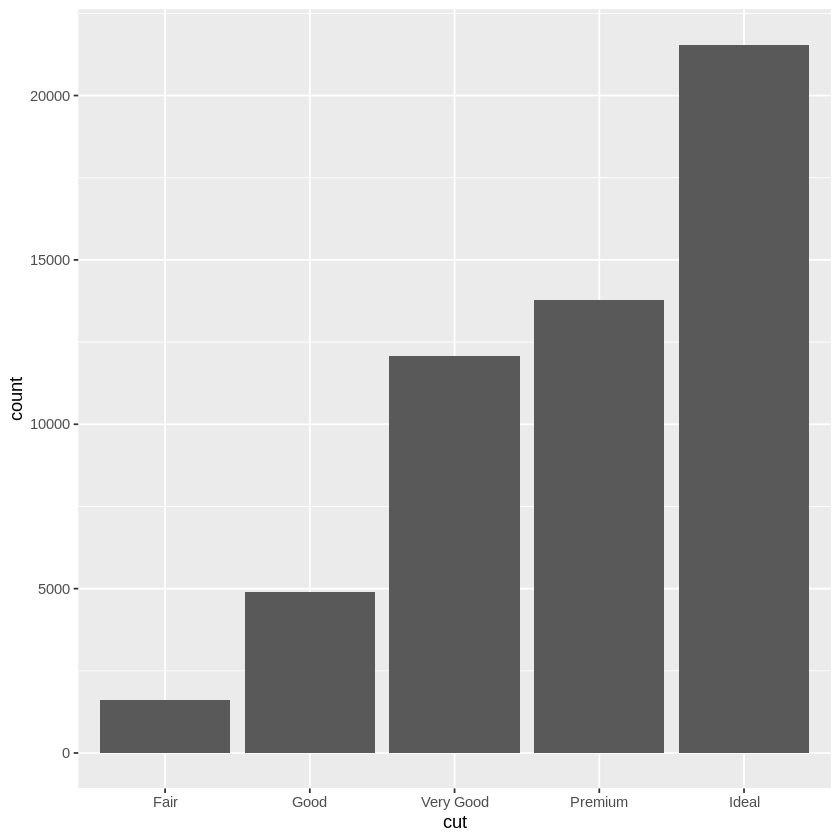

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


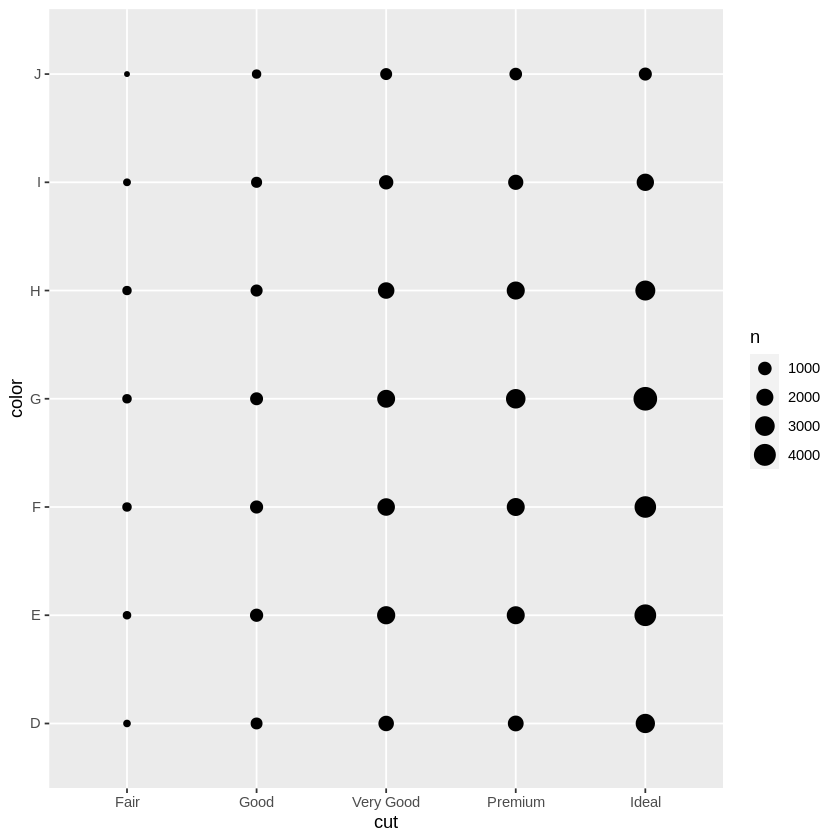

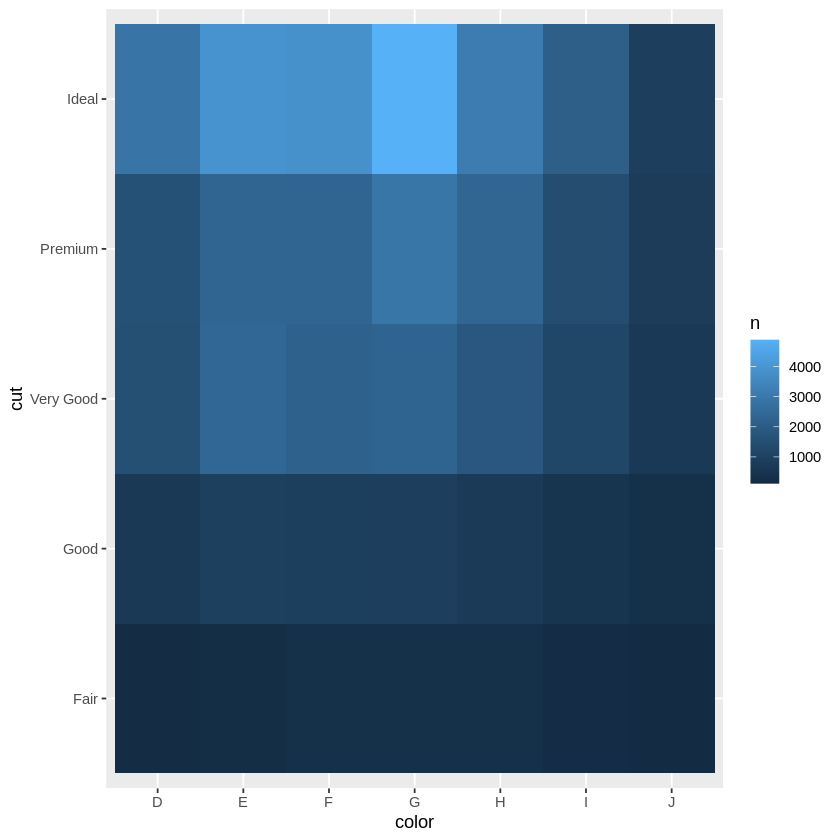

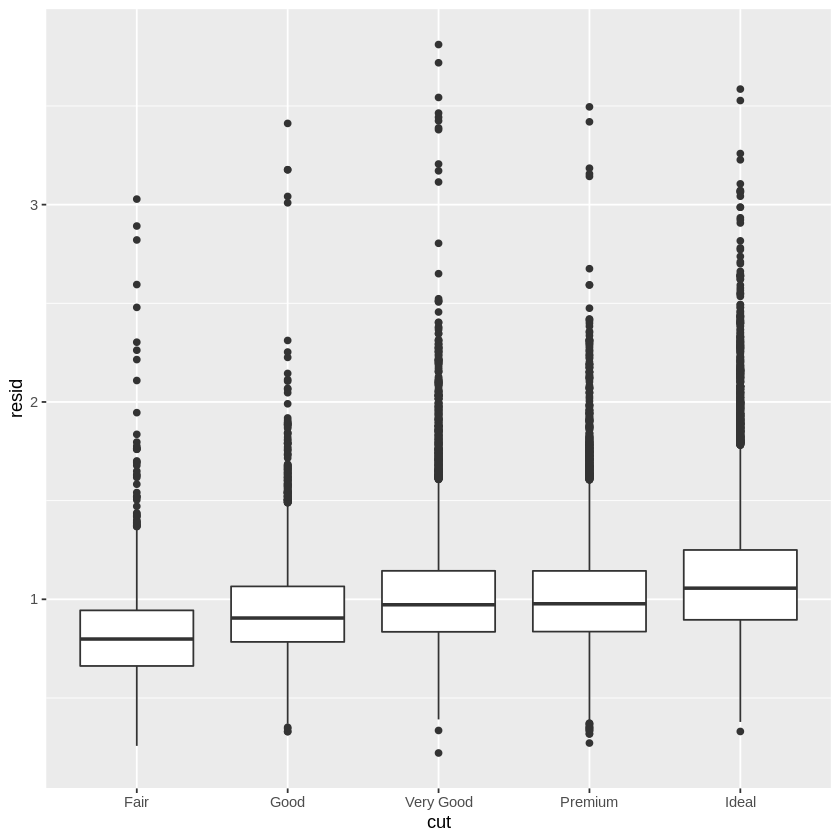

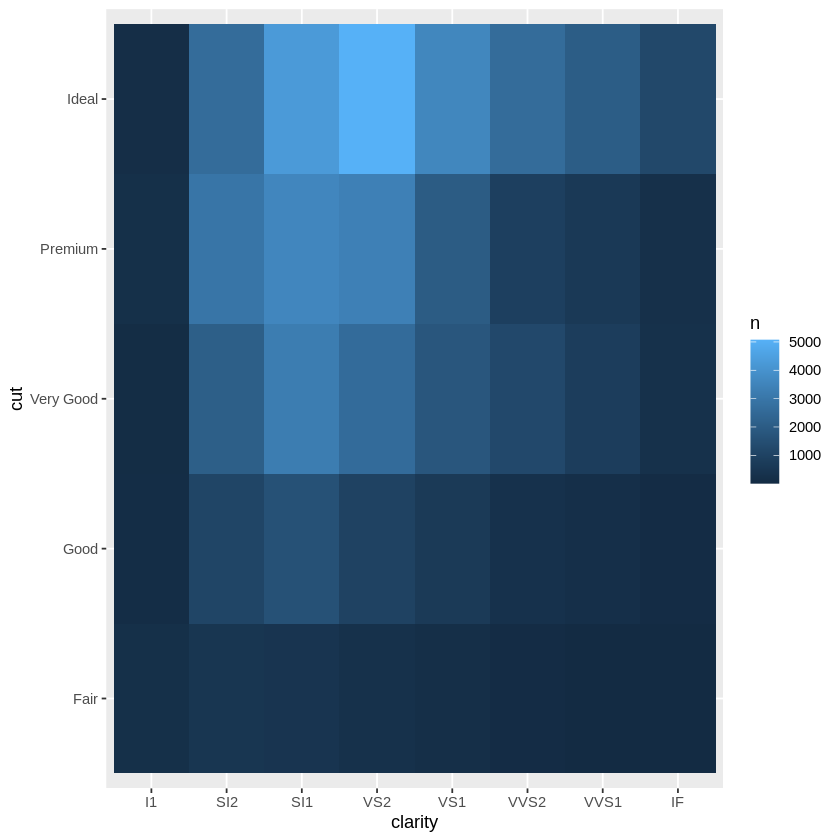

In [24]:
#cut
ggplot(data = diamantes) +
  geom_bar(mapping = aes(x = cut))
diamonds %>% 
  count(cut)

ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

diamonds %>% 
  count(color, cut)

diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n))

ggplot(data = diamonds2) + 
  geom_boxplot(mapping = aes(x = cut, y = resid))

diamonds %>% 
  count(cut, clarity) %>% 
  ggplot(aes(clarity, cut, fill = n)) + 
    geom_tile()

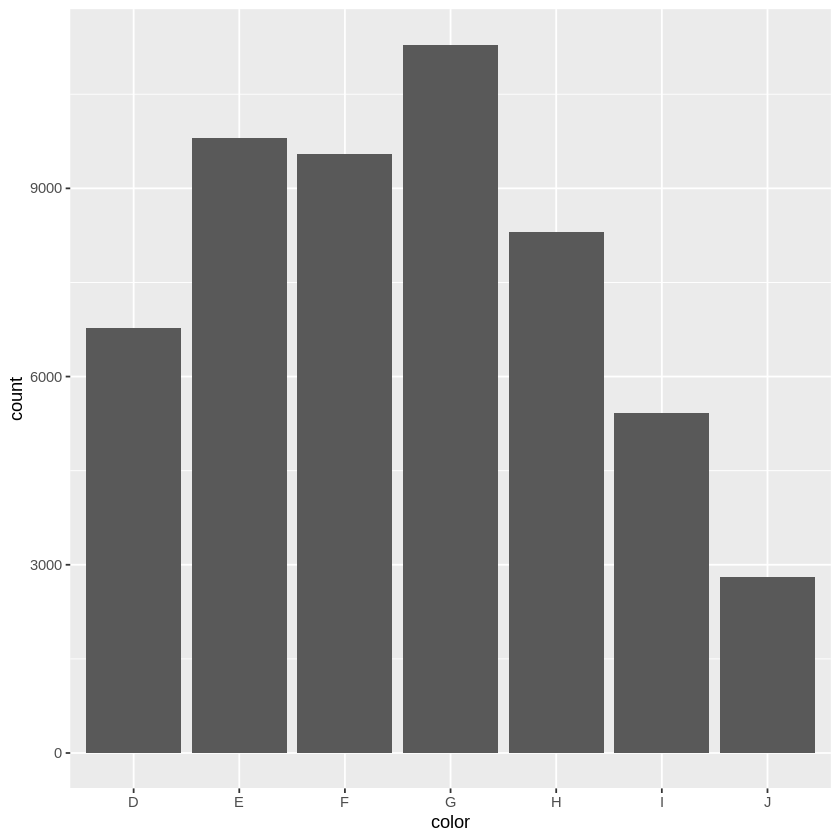

In [25]:
#color
ggplot(data = diamantes) +
  geom_bar(mapping = aes(x = color))

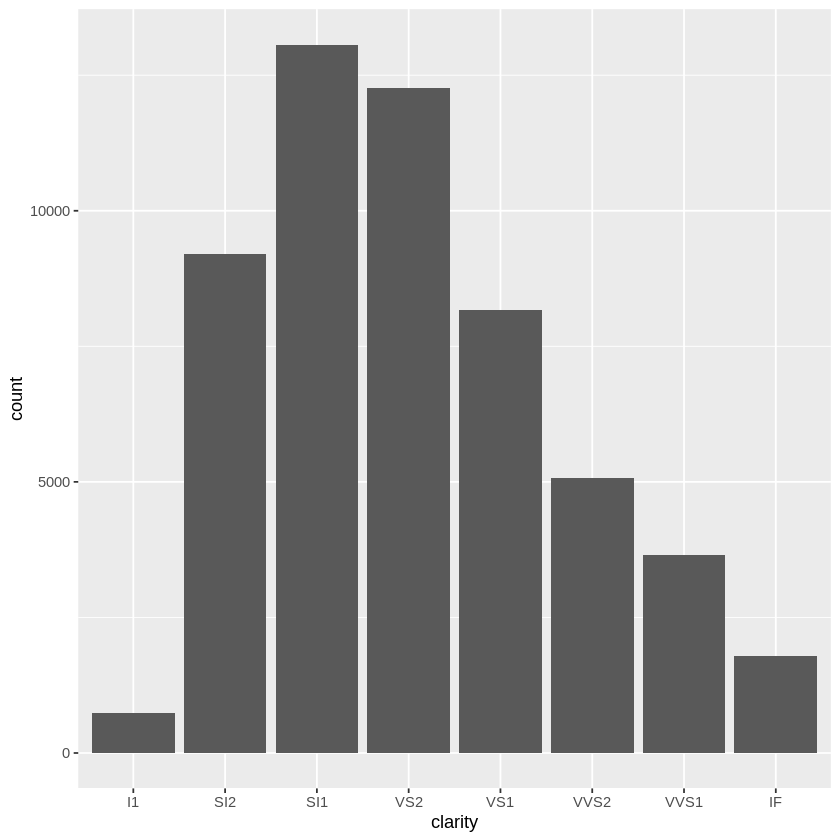

In [26]:
#clarity
ggplot(data = diamantes) +
  geom_bar(mapping = aes(x = clarity))

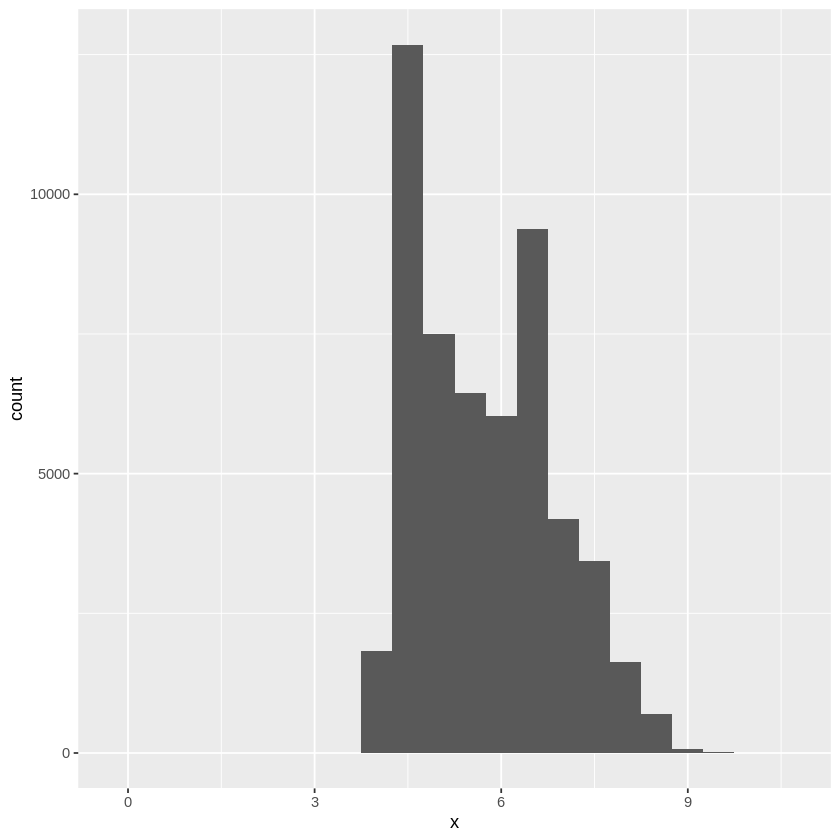

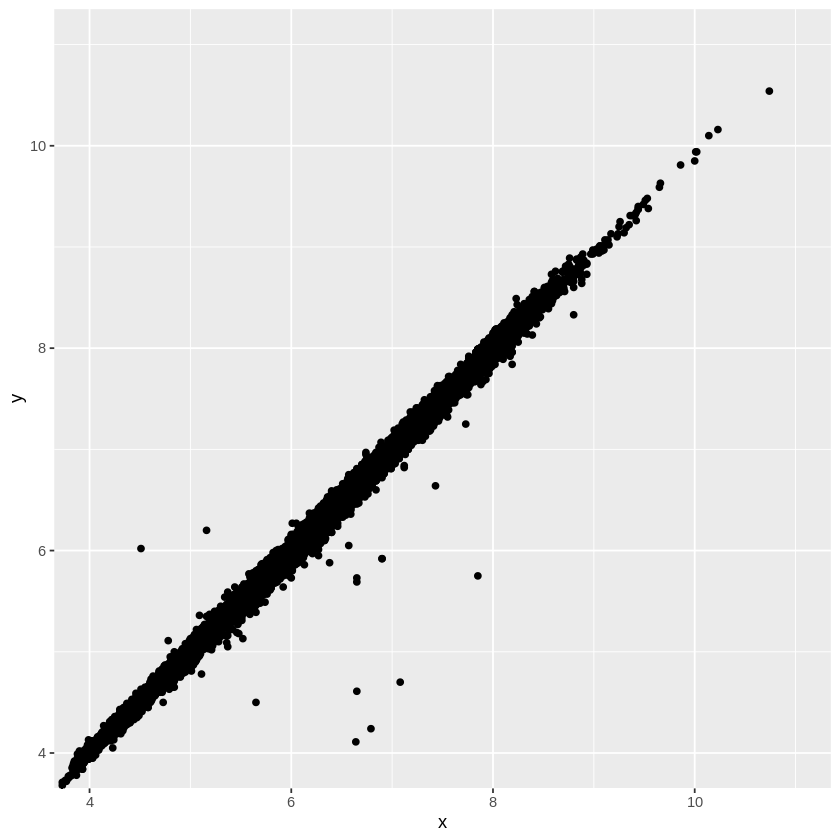

In [27]:
#x
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = x), binwidth = 0.5)

ggplot(data = diamonds) +
  geom_point(mapping = aes(x = x, y = y)) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))

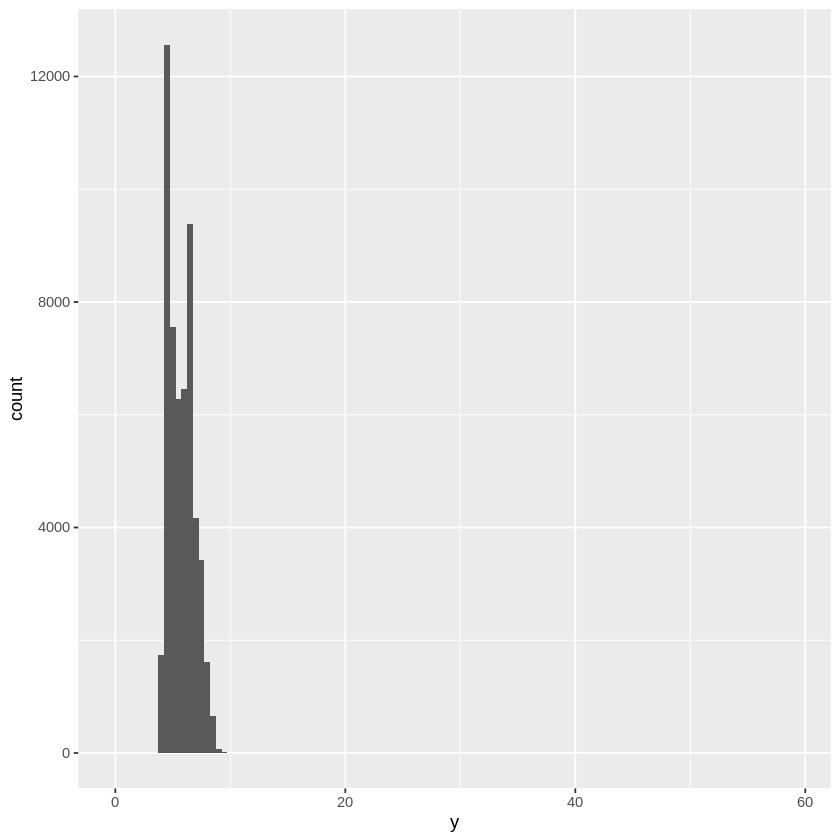

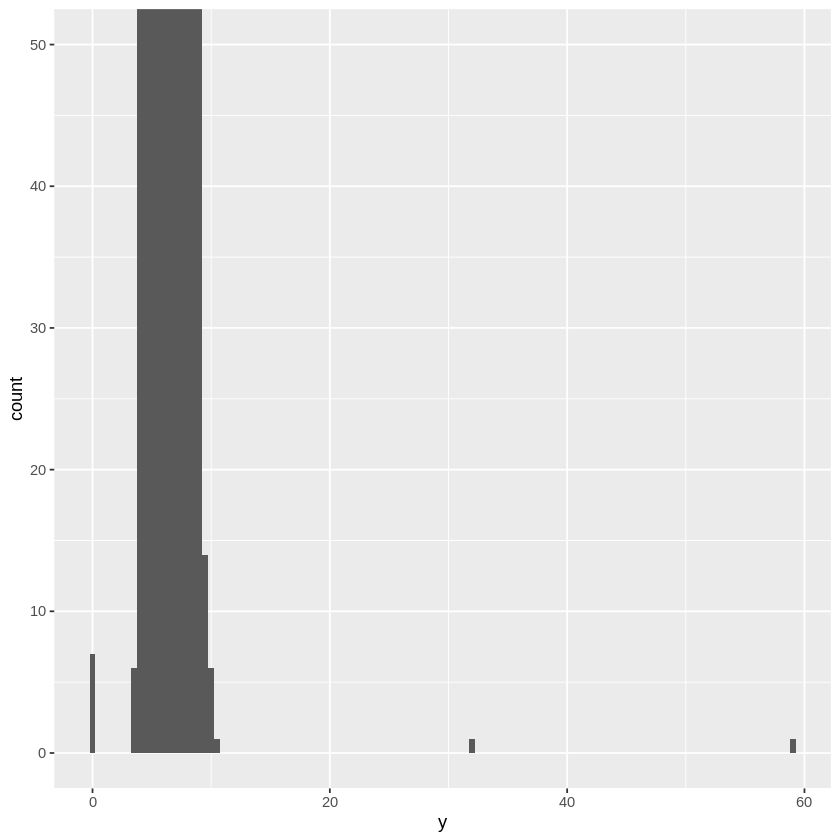

In [28]:
#y
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

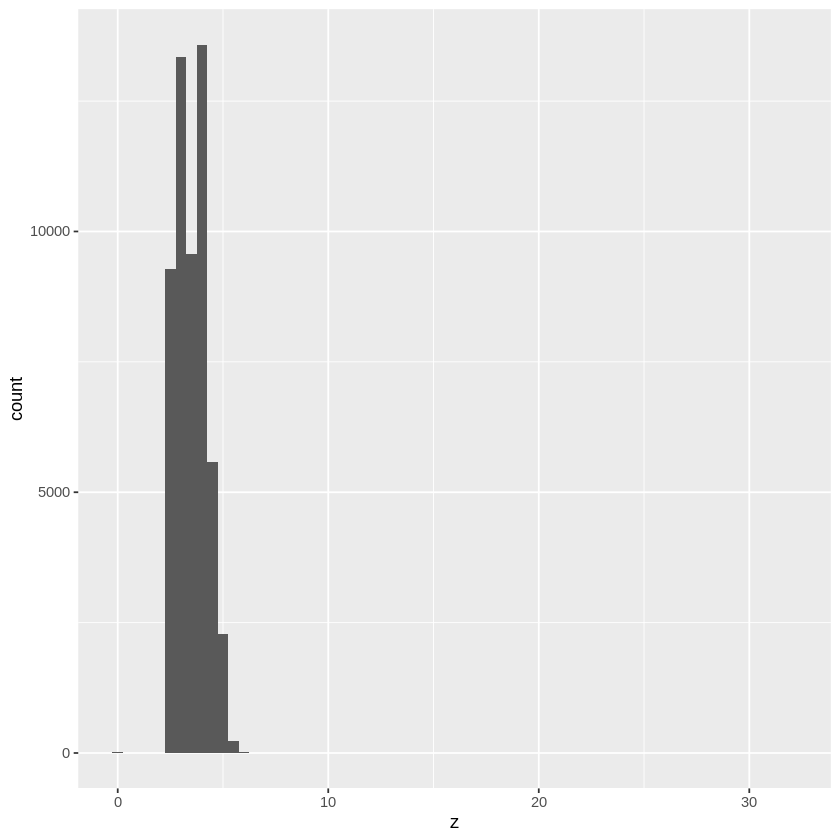

In [29]:
#z
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = z), binwidth = 0.5)

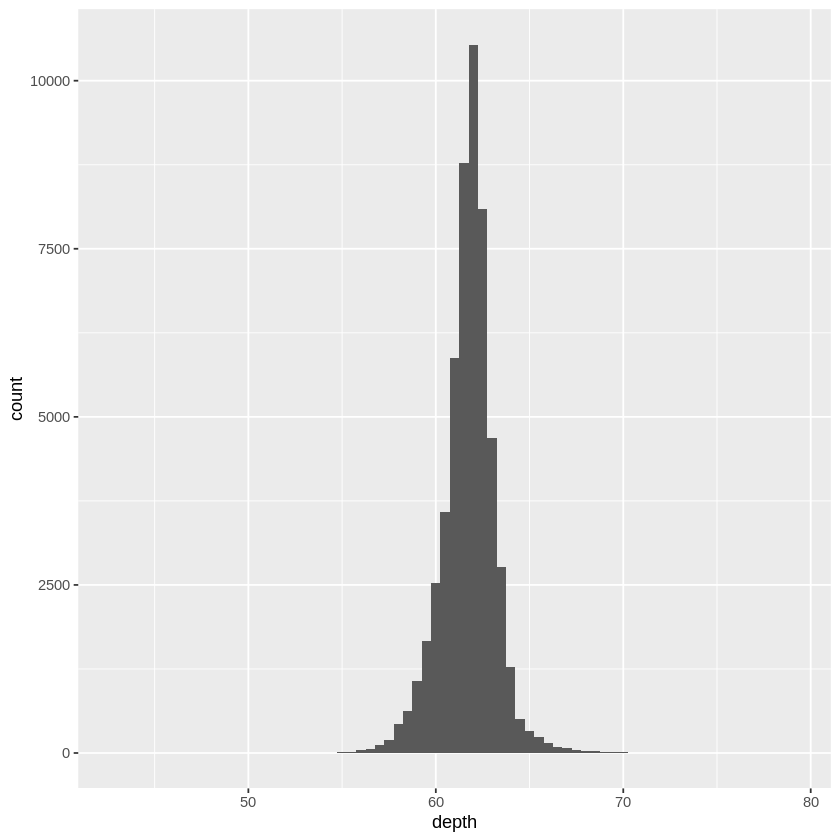

In [30]:
#depth
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = depth), binwidth = 0.5)

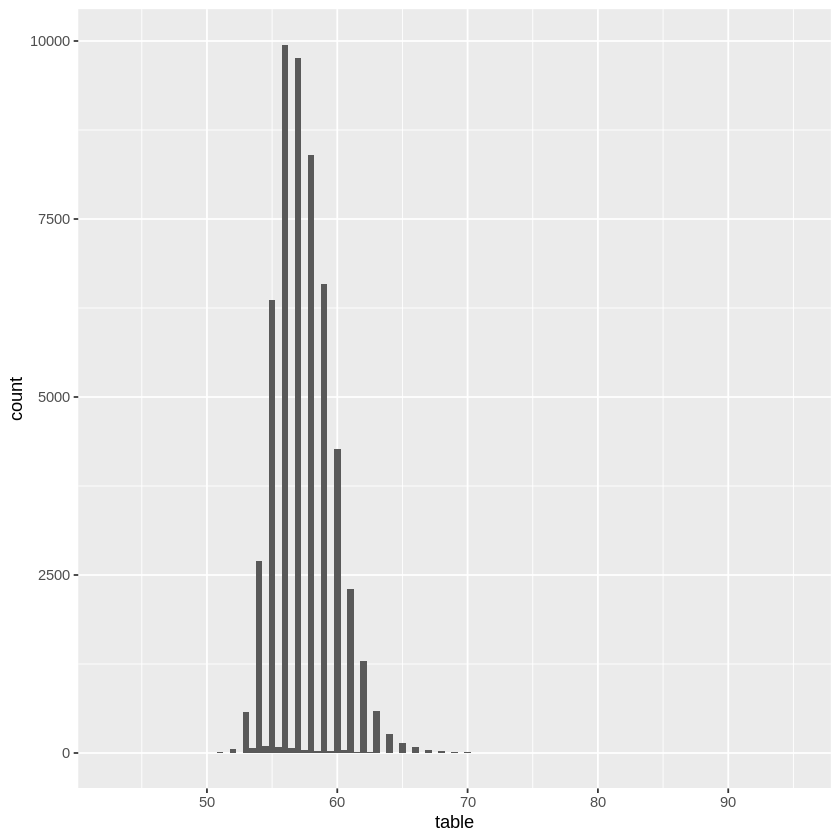

In [31]:
#table
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = table), binwidth = 0.5)

Crie boxplots para as variáveis numéricas; veja se existem dados anormais (outliers).

Utilize as variáveis categóricas para fazer o facetamento dos dados, mostrando alguns gráficos com 2 ou mais variáveis contínuas lado a lado.

Para cada resultado/gráfico obtido, explique e discuta-os, de modo a construir um relatório de exploração dos dados, que deverá ser submetido.

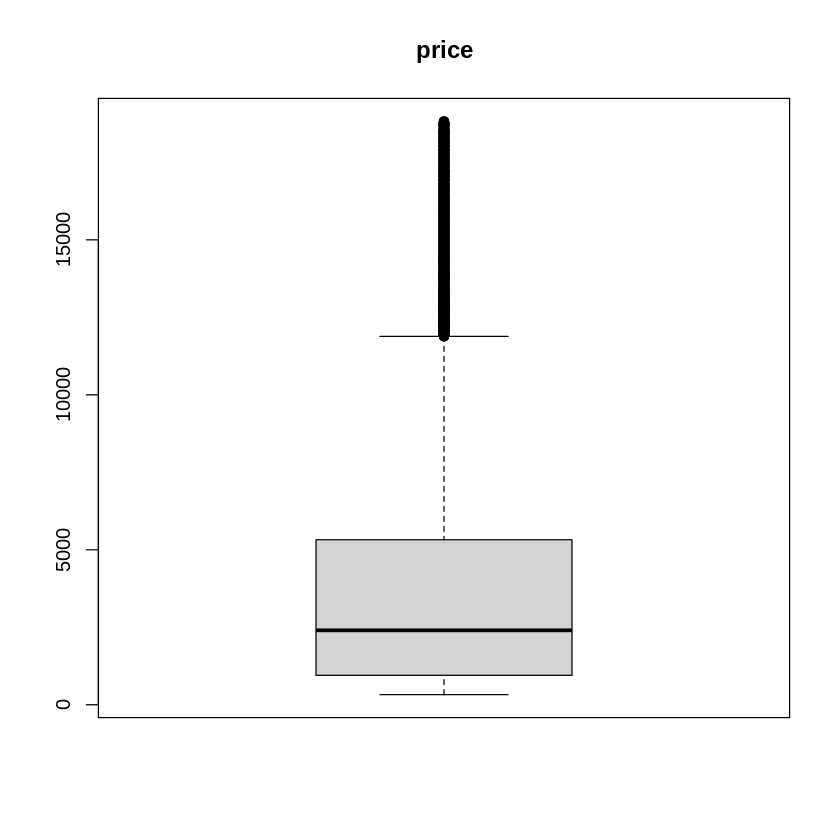

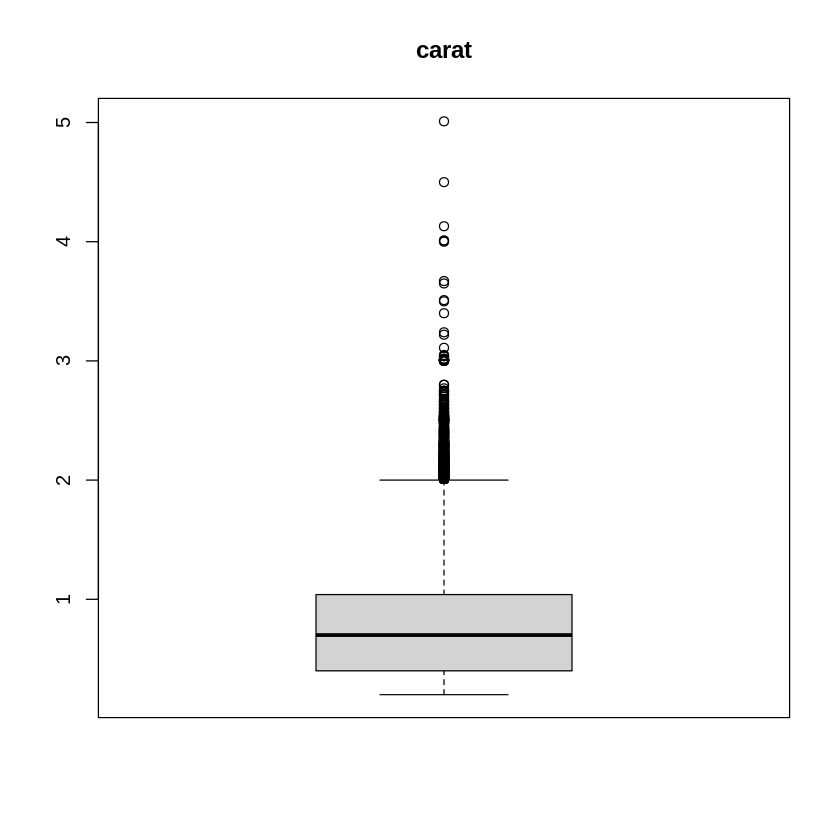

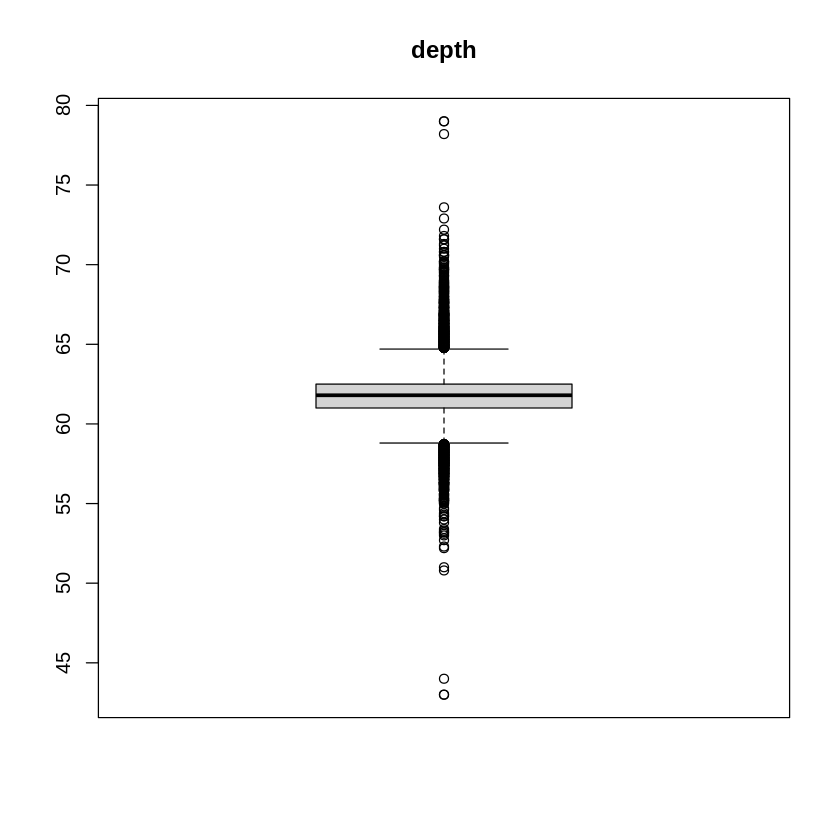

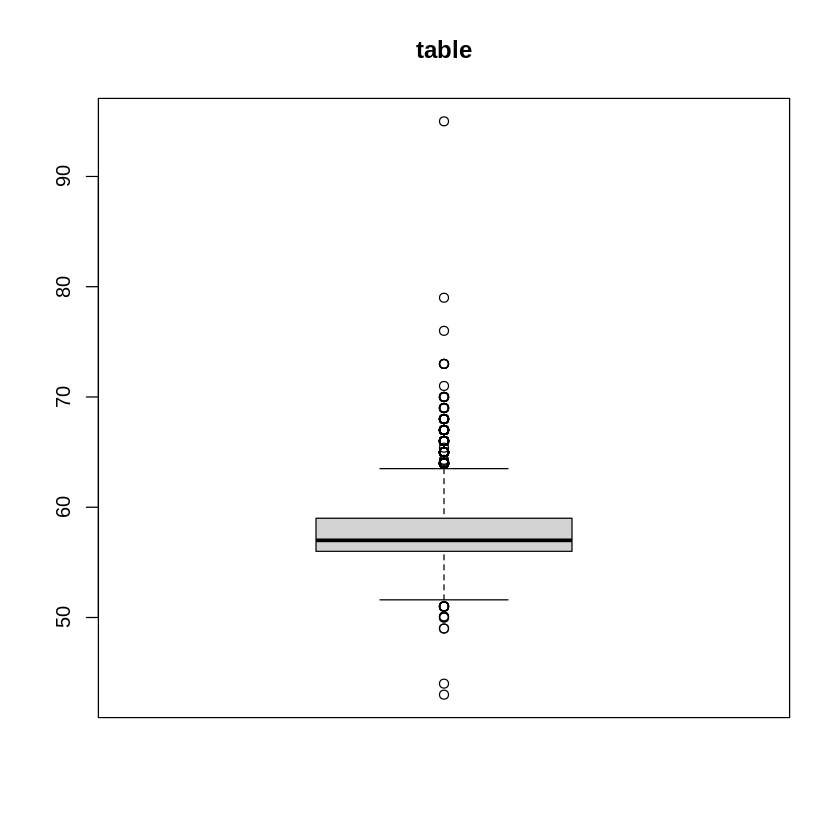

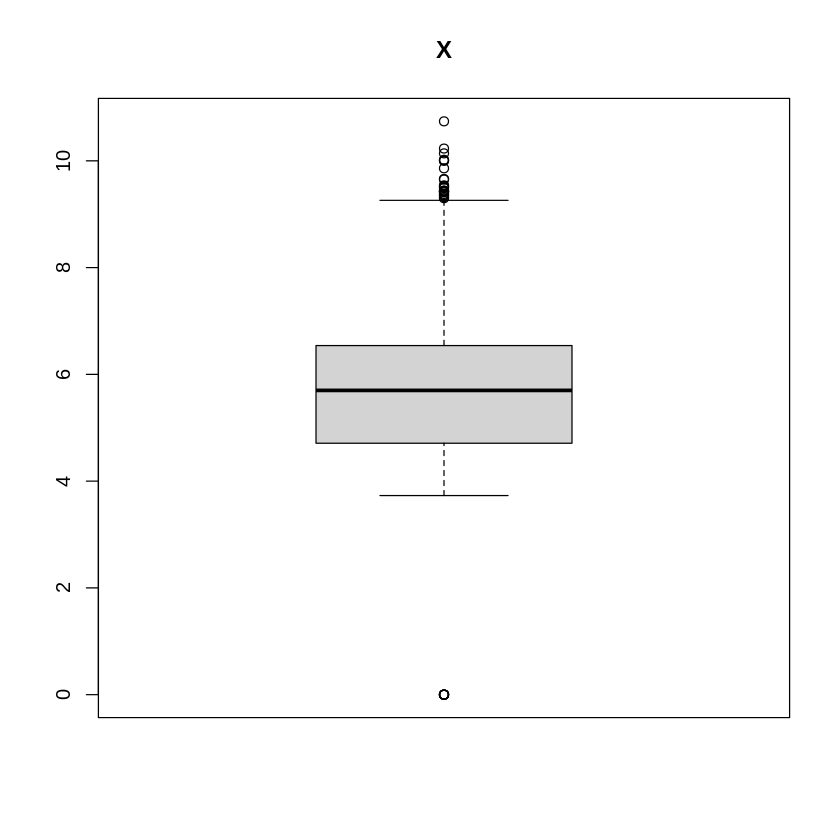

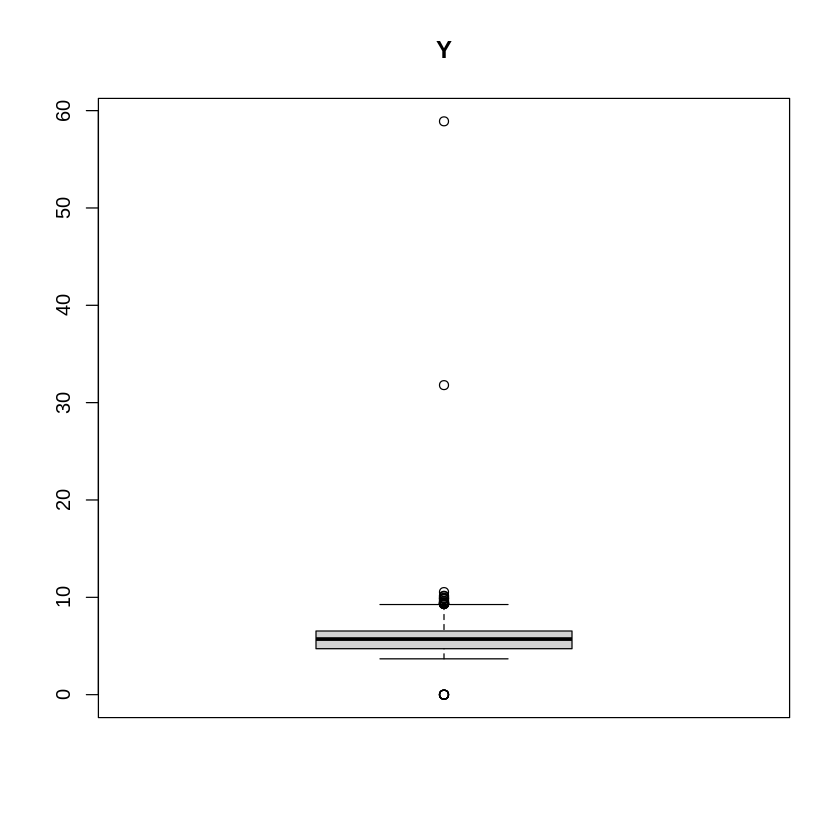

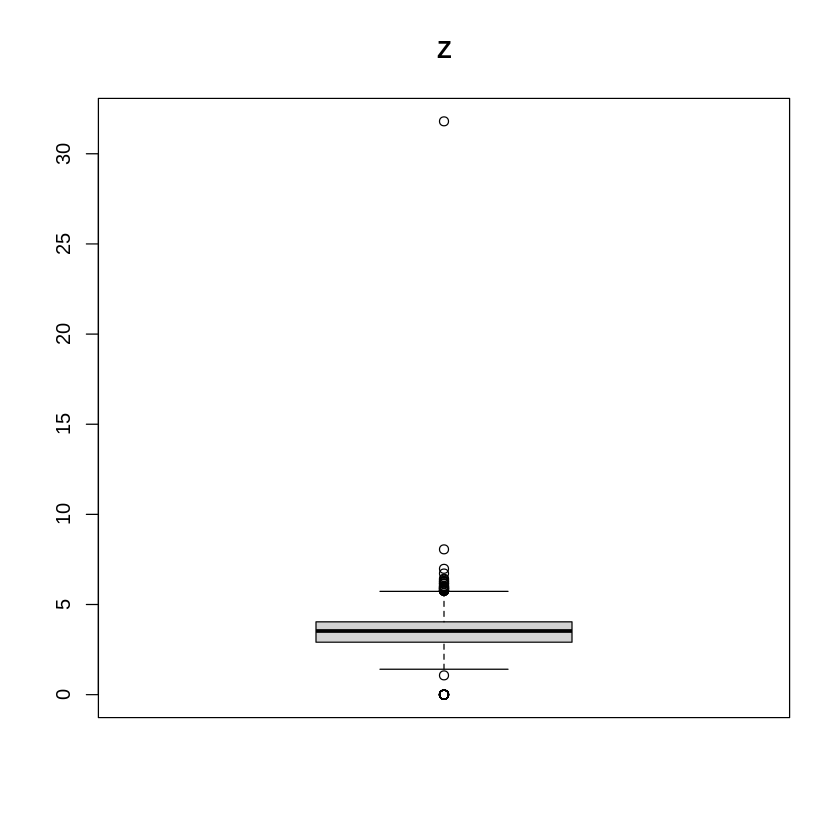

In [36]:
#Crie boxplots para as variáveis numéricas; veja se existem dados anormais (outliers).
#price
boxplot(diamantes$price, main = "price")
#carat
boxplot(diamantes$carat, main = "carat")
#depth
boxplot(diamantes$depth, main = "depth")
#table
boxplot(diamantes$table, main = "table")
#x
boxplot(diamantes$x, main = "X")
#y
boxplot(diamantes$y, main = "Y")
#z
boxplot(diamantes$z, main = "Z")

In [ ]:
diamonds2 <- diamonds %>% 
  mutate(y = ifelse(y < 3 | y > 20, NA, y))

ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point()

In [ ]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point(na.rm = TRUE)